<a href="https://colab.research.google.com/github/jofuture/project/blob/main/finish(%EC%A0%9C%EC%B6%9C%EC%9A%A92).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다음 분기에 어떤 게임을 설계해야 할까?**


1.   지역별 선호게임 장르
2.   연도별 게임 트렌드가 생각하는 문제
3. 판매량이 높은 게임에 대한 분석 및 시각화

*   내가 생각하는 문제
*   문제에 대한 가설 
*   사용한 데이터셋에 대한 설명작업 및 결과



# **데이터 정보**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()


filename = ('/content/drive/MyDrive/vgames2.csv')
df = pd.read_csv(filename)
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df = df.dropna(subset=['Genre','Publisher'])
df.drop_duplicates(keep = 'first', inplace = True)
df = df.reset_index(drop=True)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16484,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16485,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16486,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16487,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 연도 전처리
import warnings
warnings.filterwarnings("ignore")

df['Year'] = df['Year'].fillna(0)
df['Year'] = df['Year'].astype(int)

for i,Year in enumerate(df['Year']):
  if Year < 50:
    df['Year'][i]= Year + 2000
  elif 50<Year<100:
    df['Year'][i]= Year + 1900
  else:
    continue

df.groupby(by='Year').count().head()


# 매출액 전처리
def toInt(x):
  x = str(x)
  if x.endswith('K'):
    x = x.replace('K','')
    x = pd.to_numeric(x)
    x = 1/1000 * x
  elif x.endswith('M'):
    x = x.replace('M','')
    x = pd.to_numeric(x)
  else:
    x = pd.to_numeric(x)
  return x

df['NA_Sales'] = df['NA_Sales'].apply(toInt)
df['EU_Sales'] = df['EU_Sales'].apply(toInt)
df['JP_Sales'] = df['JP_Sales'].apply(toInt)
df['Other_Sales'] = df['Other_Sales'].apply(toInt)

display(df)


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,0.12,0.09,0.00,0.04
...,...,...,...,...,...,...,...,...,...
16484,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,0.15,0.04,0.00,0.01
16485,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,0.01,0.00,0.00,0.00
16486,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16487,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
df.isnull().sum()
df.isna().sum()
df.info()
# df.groupby(by='Platform').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16489 entries, 0 to 16488
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16489 non-null  object 
 1   Platform     16489 non-null  object 
 2   Year         16489 non-null  int64  
 3   Genre        16489 non-null  object 
 4   Publisher    16489 non-null  object 
 5   NA_Sales     16489 non-null  float64
 6   EU_Sales     16489 non-null  float64
 7   JP_Sales     16489 non-null  float64
 8   Other_Sales  16489 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.1+ MB


In [ ]:
year_genre_sales = df[['Name', 'Year', 'Genre','Platform','Publisher','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
year_genre_sales['Total_Sales'] = year_genre_sales[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum(axis = 1)
year_genre_sales
year_genre_sales2 = year_genre_sales[['Year', 'Genre', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]#'Total_Sales'

# **지역별 선호게임 장르**

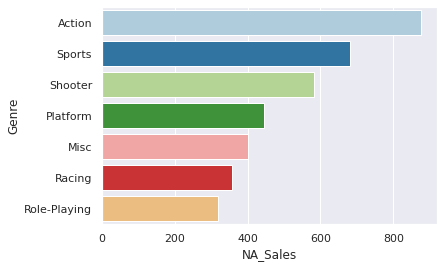

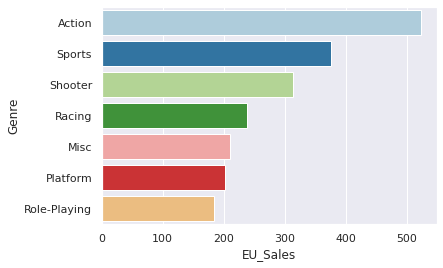

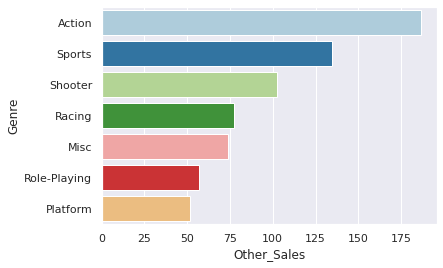

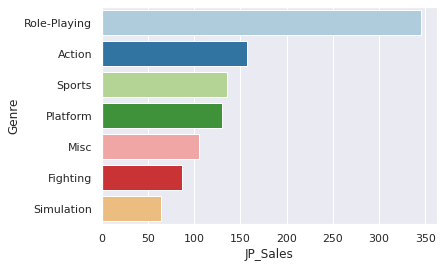

In [ ]:
nsales = year_genre_sales2[['Genre', 'NA_Sales']]
genre_sales2 = nsales.groupby(by='Genre').sum()
n6 = genre_sales2.nlargest(7,'NA_Sales')
plt.figure(figsize=(6, 4))
sns.barplot(data=n6.reset_index(),
            x="NA_Sales",
            y="Genre", 
            palette="Paired", 
            alpha=1);
# 매출액이 가장높은 지역인 북미


esales = year_genre_sales2[['Genre', 'EU_Sales']]
genre_sales2 = esales.groupby(by='Genre').sum()
e6 = genre_sales2.nlargest(7,'EU_Sales')

plt.figure(figsize=(6, 4))
sns.barplot(data=e6.reset_index(),
            x="EU_Sales",
            y="Genre", 
            palette="Paired", 
            alpha=1);


osales = year_genre_sales2[['Genre', 'Other_Sales']]
genre_sales2 = osales.groupby(by='Genre').sum()
o6 = genre_sales2.nlargest(7,'Other_Sales')

plt.figure(figsize=(6, 4))
sns.barplot(data=o6.reset_index(),
            x="Other_Sales",
            y="Genre", 
            palette="Paired", 
            alpha=1);

jsales = year_genre_sales2[['Genre', 'JP_Sales']]
genre_sales2 = jsales.groupby(by='Genre').sum()
j6 = genre_sales2.nlargest(7,'JP_Sales')

plt.figure(figsize=(6, 4))
sns.barplot(data=j6.reset_index(),
            x="JP_Sales",
            y="Genre", 
            palette="Paired", 
            alpha=1);

1. 일본을 제외한 지역별 선호 장르 Top 3

*   Action
*   Sports 
*   Shooter 


2. 일본의 장르 선호도 

*   Role-Playing
*   Action
*   Sports

네 지역 모두 Action,Sports 장르의 인기가 높다.




# **연도별 게임트렌드**

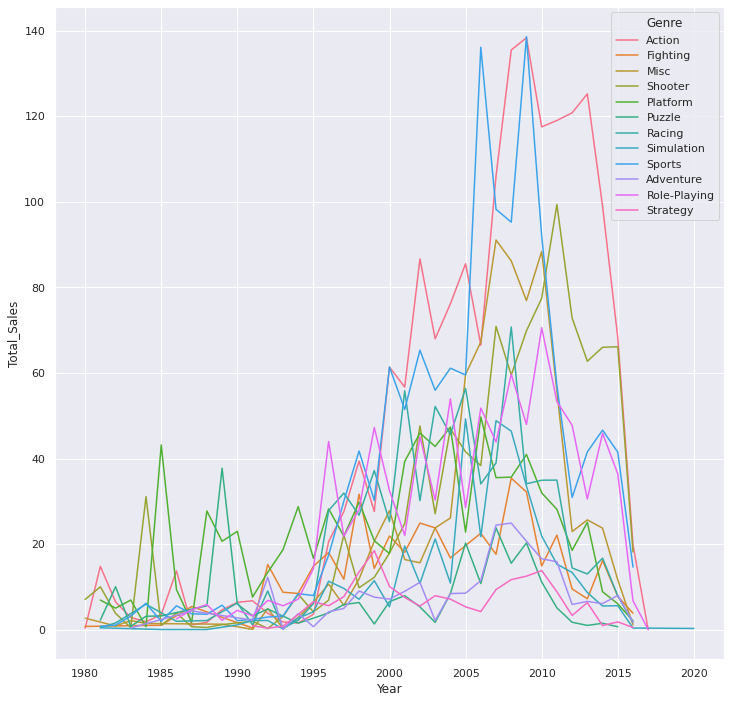

In [ ]:
# 연도별 발매된 게임장르

year_genre = year_genre_sales.drop(['Name','Platform','NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], axis = 1)
year_genre = year_genre.groupby(['Year', 'Genre'], as_index = False).sum()
year_genre

# 연도별 장르 트렌드
plt.figure(figsize = (12, 12))
sns.lineplot(x = 'Year',
             y = 'Total_Sales',
             hue = 'Genre',
             data = year_genre)
plt.show()

**1. 연도별 출시된 게임 수**

90년대 중후반을 기점으로 출시율이 점차 증가하다 

게임시장의 전성기로 알려진 

2000년대 후반 출시율이 대폭 상승하였지만

 2010년대에 들어서는 다시 하락하는 것을 확인 할 수있다.

*※ 2010년대 이후 데이터가 충분하지 않음에 유의*


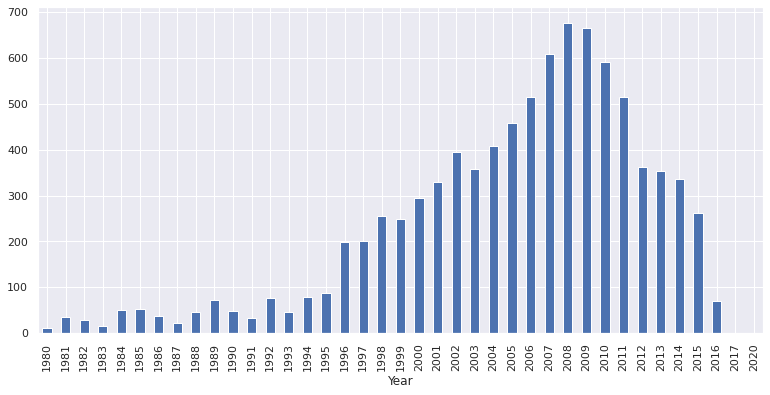

In [ ]:
yearsales_ = year_genre_sales.groupby(by="Year").Total_Sales.sum()
yearsales_.plot(kind='bar', figsize=(13, 6));

**2. 연도별 게임 산업 매출**

또한 2013년부터 2016년까지 출시되는 게임들의 수가 소폭 상승하였으나

 판매량은 지속적으로 하락하는 추세임을 알 수 있다.

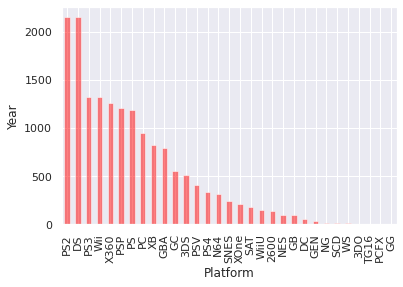

In [ ]:
# 플랫폼 누적매출 비교
g4 = year_genre_sales.groupby('Platform')['Total_Sales'].count()
g4 = g4.sort_values(ascending = False)
g4

g4.plot(kind='bar', alpha = 0.5, color = 'red')
plt.ylabel('Year')
plt.show()

**3. 2010년 이후의 연도별 게임 트렌드 (+ 플랫폼)**


2012년 단종된 PS2의 경우 게임시장 호황기 였던 2000년대 후반,

 매출에 영향을 받은것으로 판단된다. 

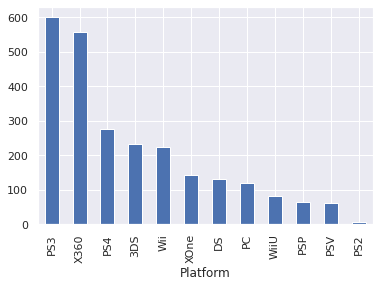

In [ ]:
year_genre_sales[year_genre_sales['Year'] >=2010].groupby(by=["Platform"]).Total_Sales.sum().sort_values(ascending=False).head(15).plot(kind='bar');


4. 따라서 2010년도 이후 플랫폼 매출을 분석한 결과
가정용 게임 기기의 매출이 높은 것으로 확인

# **판매량이 높은 게임에 대한 분석 및 시각화**

In [ ]:
top10sales = year_genre_sales.sort_values(by = 'Total_Sales', ascending = False).head(20)# 전체게임중 상위 1% 게임
top10sales# 그 중 판매량이 높은 20개 게임

,Name,Year,Genre,Platform,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
2894,Wii Sports,2006,Sports,Wii,Nintendo,41.49,29.02,3.77,8.46,82.74
4172,Super Mario Bros.,1985,Platform,NES,Nintendo,29.08,3.58,6.81,0.77,40.24
12499,Mario Kart Wii,2008,Racing,Wii,Nintendo,15.85,12.88,3.79,3.31,35.83
3336,Wii Sports Resort,2009,Sports,Wii,Nintendo,15.75,11.01,3.28,2.96,33.00
7782,Pokemon Red/Pokemon Blue,1996,Role-Playing,GB,Nintendo,11.27,8.89,10.22,1.00,31.38
1200,Tetris,1989,Puzzle,GB,Nintendo,23.20,2.26,4.22,0.58,30.26
6895,New Super Mario Bros.,2006,Platform,DS,Nintendo,11.38,9.23,6.50,2.90,30.01
2999,Wii Play,2006,Misc,Wii,Nintendo,14.03,9.20,2.93,2.85,29.01
16424,New Super Mario Bros. Wii,2009,Platform,Wii,Nintendo,14.59,7.06,4.70,2.26,28.61
10427,Duck Hunt,1984,Shooter,NES,Nintendo,26.93,0.63,0.28,0.47,28.31


**1.** 총판매량이 높은 게임을 찾기 위해 

판매량이 높은 순서대로 데이터를 분류하였다.


In [ ]:
NGP = df[['Name', 'Genre','Platform','Year']]
NGP[NGP["Platform"] == "PS3"]


,Name,Genre,Platform,Year
4,Ben 10 Ultimate Alien: Cosmic Destruction,Platform,PS3,2010
8,Imabikisou,Adventure,PS3,2007
9,The Penguins of Madagascar: Dr. Blowhole Retur...,Action,PS3,2011
15,Mini Ninjas,Action,PS3,2009
17,Hajime no Ippo: The Fighting! (2014),Sports,PS3,2014
...,...,...,...,...
16456,Way of the Samurai 3,Action,PS3,2008
16459,Yakuza,Action,PS3,2012
16479,MindJack,Shooter,PS3,2011
16481,White Album: Tsuzurareru Fuyu no Omoide,Adventure,PS3,2010


**2.** 매출액을 기반으로 게임시장규모가 가장 큰 북미의 1위 플랫폼인 PS3의

 발매년도를 살펴보면 비교적 최근에 출시되었기 때문에 지속적인 

 게임출시가 가능할것으로 판단된다.

# **가설**

일본의 닌텐도사가 출시하는 가정용게임기가 

전세계적으로 발매량이 높은 것은 사실로 확인되었으나 

지역별 판매량을 봤을때 미국의 게임시장규모가 더 크다.

따라서 북미를 타깃으로 하기전에

북미지역과 일본의 매출이 어느정도의 연관이 있을지

가설검정을 시작한다.

(0.0, 400.0)

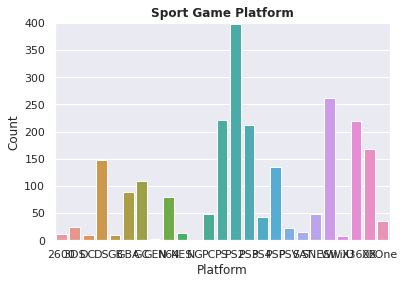

In [ ]:
NA_JP = df[df['Genre'] == 'Sports']
NA_JP


sns.barplot(x = 'Platform', y = 'Name',
            data = pd.DataFrame(NA_JP.groupby('Platform')['Name'].count()).reset_index())
plt.title('Sport Game Platform', fontweight = 'bold')
plt.ylabel('Count')
plt.ylim(0, 400)

In [ ]:
from scipy.stats import chi2_contingency

obs1 = pd.crosstab(df['NA_Sales'], df['JP_Sales'])
chi2_contingency(obs1, correction = False)

(972908.8554904168,
 0.0,
 99462,
 array([[2.81058172e+03, 1.89863909e+02, 1.95822548e+02, ...,
         2.70847231e-01, 2.70847231e-01, 2.70847231e-01],
        [3.36061496e+02, 2.27020438e+01, 2.34145188e+01, ...,
         3.23852265e-02, 3.23852265e-02, 3.23852265e-02],
        [3.46130754e+02, 2.33822548e+01, 2.41160774e+01, ...,
         3.33555704e-02, 3.33555704e-02, 3.33555704e-02],
        ...,
        [6.29328643e-01, 4.25131906e-02, 4.38474134e-02, ...,
         6.06464916e-05, 6.06464916e-05, 6.06464916e-05],
        [6.29328643e-01, 4.25131906e-02, 4.38474134e-02, ...,
         6.06464916e-05, 6.06464916e-05, 6.06464916e-05],
        [6.29328643e-01, 4.25131906e-02, 4.38474134e-02, ...,
         6.06464916e-05, 6.06464916e-05, 6.06464916e-05]]))


귀무가설 : Sports 장 북미와 일본 매출은 연관이 없다.

대립가설 : Sports 장 북미와 일본 매출은 연관이 있다.

기각 -> 두 지역의 매출은 연관이 있다

P-Value 값이 5%미만인 0에 수렴하므로 귀무가설을 기각한다.



# **결론**




다음분기에 설계하게 될 게임에 대한 결론을 내기에 앞서


제가 생각했던 문제를 먼저 말씀드리겠습니다.


게임시장은 한편의 히트작이 매출에 큰 영향을 끼치는 등 변화를 예측하기가 


상대적으로 어려운 업계입니다. 근거로 2000년대후반까지 역대매출을 기록한 PS2가

2012년 돌연 단종된 예시가 있습니다.


그리고 게임을 즐길 플랫폼과 하드웨어에 따른 영향도 많이 받는것을 휴대용,

가정용게임기,PC등을 통해 알 수 있겠고요.

닌텐도사에서 출시되는 플랫폼 게임들이 꾸준한 판매량을 올리고 있습니다.

특히 현재 일본에서는 코로나의 확산으로 소비자의 집콕소비 추세가 강화되면서

가정용 게임에 대한 수요가 지속적으로 증가하고 있다고 합니다.

하지만 이미 내수도가 높은 일본 게임시장을 자국 플랫폼인 닌텐도가 점유한 

상황에서 타겟으로 삼기에는 어려울것이라 판단하였고

전체 판매량이 높은 북미시장을 타겟으로 설정하였습니다.


이것에 대한 근거로 간단한 가설검정을 시행한 결과

일본의 닌텐도사 제품이

전세계적으로 발매량이 높은것은것은 사실이나 지역별 판매량을 봤을때 미국의 


게임시장 규모가 더 크다는 것도 확인되었습니다.


이렇게해서 다음 분기에 설계해야 될 게임은

가정용 게임기인 PS3를 기반으로한 액션장르의 게임을 지속적으로 업데이트하며 설계해야 할것으로 판단됩니다.
